[20:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


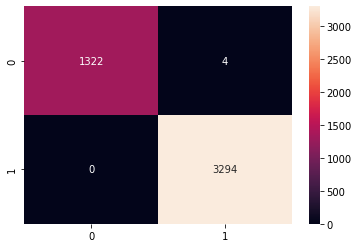

              precision    recall  f1-score   support

           0     1.0000    0.9970    0.9985      1326
           1     0.9988    1.0000    0.9994      3294

    accuracy                         0.9991      4620
   macro avg     0.9994    0.9985    0.9989      4620
weighted avg     0.9991    0.9991    0.9991      4620

      dataset_id  FRAUD_NONFRAUD
0              1               1
1              2               1
2              3               1
3              4               1
4              5               1
...          ...             ...
5995        5996               1
5996        5997               0
5997        5998               1
5998        5999               0
5999        6000               1

[6000 rows x 2 columns]


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

labelencoder = LabelEncoder()

# import training set & test set
train = pd.read_excel('b765dc3d8076-trainset+(1).xlsx')
test = pd.read_excel('b765dc3d8076-testset_for_participants.xlsx')

# isolate dataset_id from test set
dataset_id = test['dataset_id'].to_numpy()

# remove redundant and unneeded features
test = test.drop(columns=['ACTN_CD', 'ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'CUST_SINCE_DT', 'dataset_id'])
train = train.drop(columns=['ACTN_CD', 'ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'CUST_SINCE_DT'])

# convert categorical data into label-encoded data (0 - n_classes - 1)
objList = train.select_dtypes(include="object").columns
for feat in objList:
    train[feat] = labelencoder.fit_transform(train[feat].astype(str))
objList = test.select_dtypes(include="object").columns
for feat in objList:
    test[feat] = labelencoder.fit_transform(test[feat].astype(str))

# finalize train and test set for classification
X = train.drop(columns=['FRAUD_NONFRAUD'])
y = train.loc[:, 'FRAUD_NONFRAUD']

# split train data for for testing algorithm performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# build model
clf = xgb.XGBClassifier(
    use_label_encoder=False
)
clf.fit(X, y)

# test model predictions on training set
y_pred = clf.predict(X_test)

# final prediction on test set
pred = clf.predict(test)
pred = np.asarray(pred)

# prepare results
results_array = np.column_stack((dataset_id, pred))
results_df = pd.DataFrame(results_array, columns=['dataset_id', 'FRAUD_NONFRAUD'])

# display model performance on training set
## confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

## classification report
print(classification_report(y_test, y_pred, digits=4))

## results table
print(results_df)
results_df.to_excel("results.xlsx")